In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 11

In [3]:
N = 500                                # number of points in each direction
x_start, x_end = -2.0, 2.0            # boundaries in the x-direction
y_start, y_end = -1.0, 1.0            # boundaries in the y-direction
x = np.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
y = np.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates

X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [4]:
strength_source = 5.0                      # source strength
x_source, y_source = -1.0, 0.0             # location of the source

# compute the velocity field on the mesh grid
u_source = strength_source/(2*np.pi) * (X-x_source)/((X-x_source)**2 + (Y-y_source)**2)
v_source = strength_source/(2*np.pi) * (Y-y_source)/((X-x_source)**2 + (Y-y_source)**2)

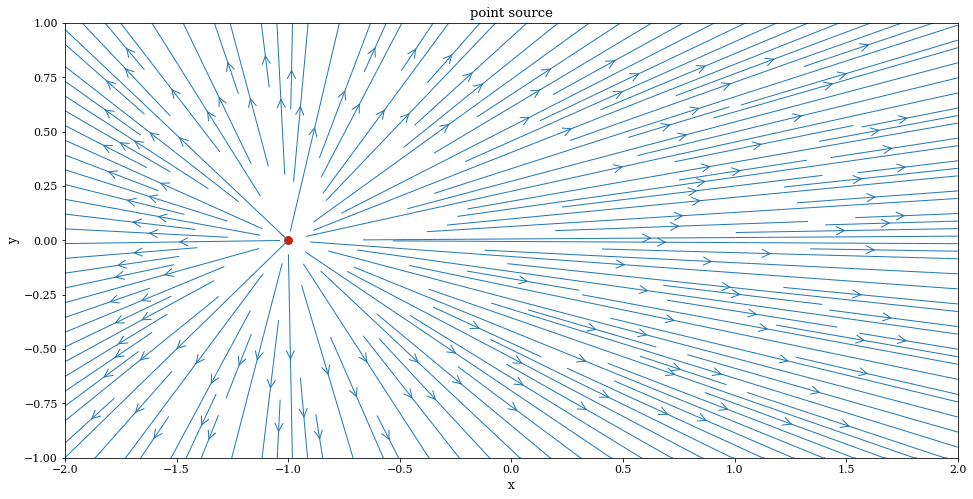

In [5]:
# plot the streamlines
size = 16
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_source, v_source, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter(x_source, y_source, color='#CD2305', s=80, marker='o', linewidth=0)
plt.title('point source');

In [6]:
strength_vortex = 5.0                      # source strength
x_vortex, y_vortex = 1.0, 0.0             # location of the source

# compute the velocity field on the mesh grid
u_vortex = -strength_vortex/(2*np.pi) * (Y-y_vortex)/((X-x_vortex)**2 + (Y-y_vortex)**2)
v_vortex =  strength_vortex/(2*np.pi) * (X-x_vortex)/((X-x_vortex)**2 + (Y-y_vortex)**2)

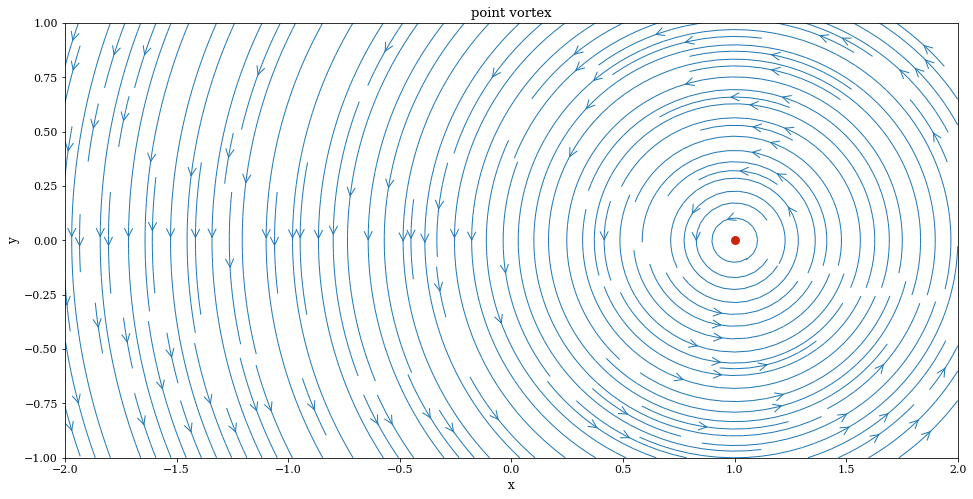

In [7]:
# plot the streamlines
size = 16
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_vortex, v_vortex, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o', linewidth=0)
plt.title('point vortex');

In [8]:
def complex_potential(X,Y,A,k):
    if k != -1:
        return A/(k+1)*(X+Y*1j)**(k+1)
    else:
        return A*np.log(X+Y*1j)

In [9]:
def complex_velocity(X,Y,A,k):
    return A*(X+Y*1j)**k

In [23]:
k = -2
A = -1
w3 = complex_velocity(X,Y,A,k)
W3 = complex_potential(X,Y,A,k)

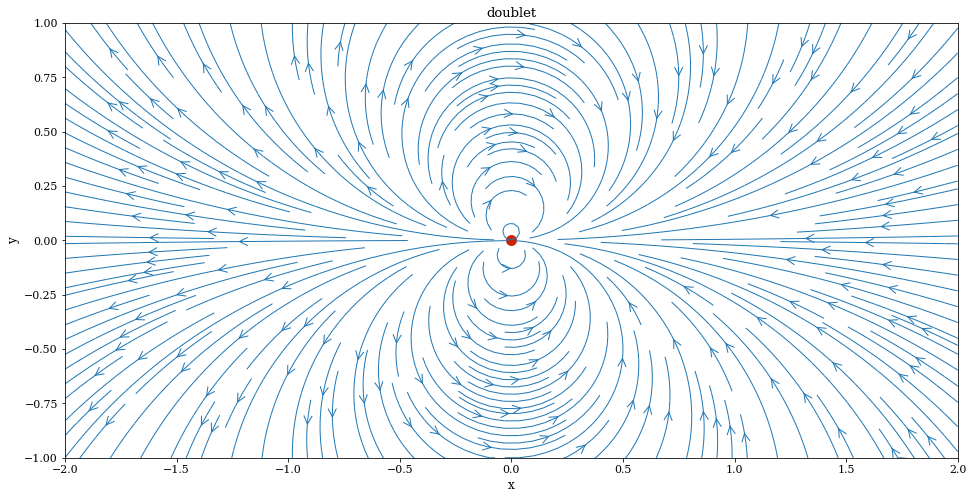

In [24]:
size = 16
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, w3.real, -w3.imag, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter(0.0, 0.0, color='#CD2305', s=120, marker='o', linewidth=0)
plt.title('doublet');

In [10]:
k = -2
A = 1j
w4 = complex_velocity(X,Y,A,k)
W4 = complex_potential(X,Y,A,k)

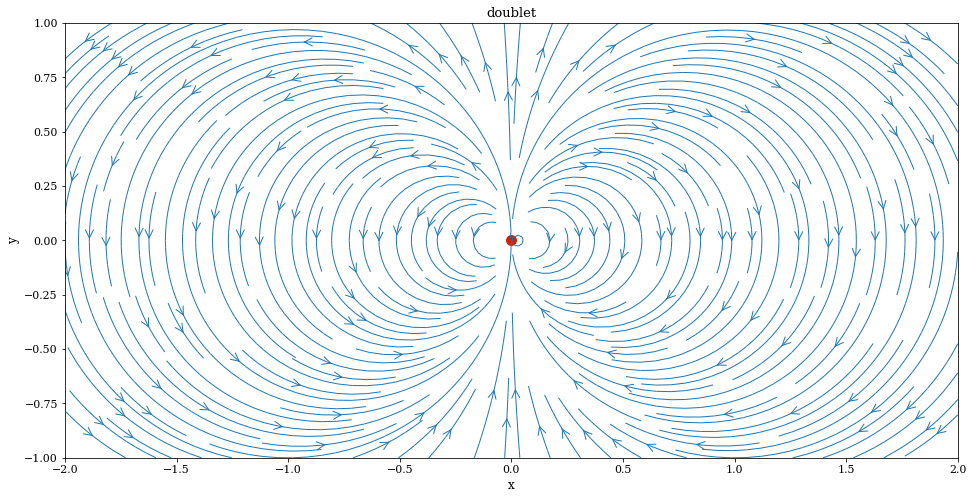

In [18]:
size = 16
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, w4.real, -w4.imag, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter(0.0, 0.0, color='#CD2305', s=120, marker='o', linewidth=0)
plt.title('doublet');

In [30]:
U = 1
Γ = 3
α = 0.
R = 0.5




In [55]:
def lifting_cylinder(X,Y,U,Γ,α,R):
    
    Wlc = complex_potential(X,Y,U,0)*np.exp(-α*1j) - \
          complex_potential(X,Y,U*R**2,-2)*np.exp(α*1j)- \
          complex_potential(X,Y,1j*Γ/(2*np.pi),-1)
            
    wlc = complex_velocity(X,Y,U,0)*np.exp(-α*1j) - \
          complex_velocity(X,Y,U*R**2,-2)*np.exp(α*1j)- \
          complex_velocity(X,Y,1j*Γ/(2*np.pi),-1)
    
    size = 16
    
    plt_stag = False
    crt_val = Γ/(4*np.pi*R*U)
    
    if crt_val <= 1 and crt_val >= -1:
        plt_stag = True
        θs = np.arcsin(crt_val)
        x_stagn1, y_stagn1 = R*np.cos(α+θs),R*np.sin(α+θs)
        x_stagn2, y_stagn2 = R*np.cos(np.pi+α-θs),R*np.sin(np.pi+α-θs)
    else:
        x_stagn1, y_stagn1 = 0, Γ/(4*np.pi*U) -np.sqrt((Γ/(4*np.pi*U))**2-R**2)
    
    
    plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
    #CS = plt.contour(X, Y, Wlc.imag)
    #CS1 = plt.contour(X, Y, Wlc.real)
    plt.streamplot(X, Y, wlc.real, -wlc.imag, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
    #plt.clabel(CS, inline=5, fontsize=10)
    circle = plt.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
    plt.gca().add_patch(circle)
    plt.scatter(0, 0, color='#CD2305', s=80, marker='o')
    
    if plt_stag:
        plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');
    else:
        plt.scatter(x_stagn1, y_stagn1, color='k', s=80, marker='o');

    
    plt.title(r'lifting cylinder: $U_{\infty}=$'+str(U)+r' - $\alpha=$'+str(np.rad2deg(α))+r' - $\Gamma=$'+str(Γ));

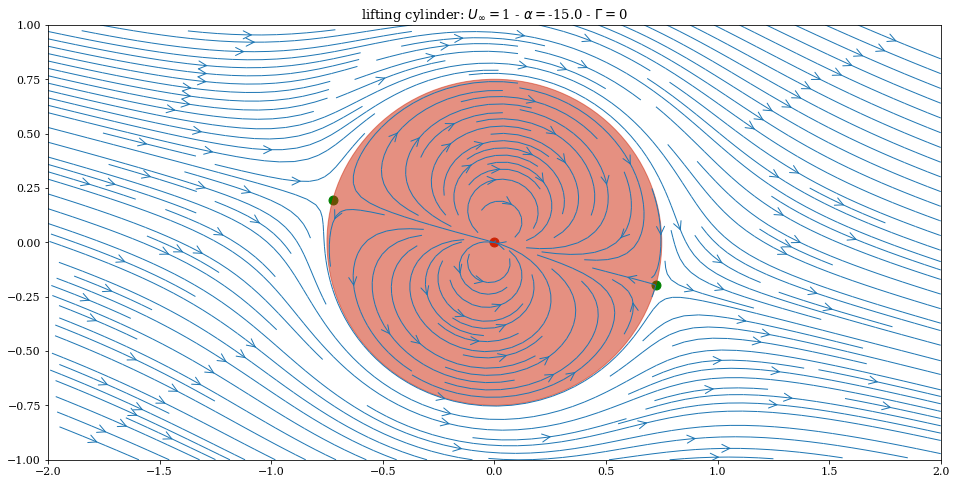

In [56]:
lifting_cylinder(X,Y,U=1,Γ = 0, α = -np.pi/12 , R = 0.75)


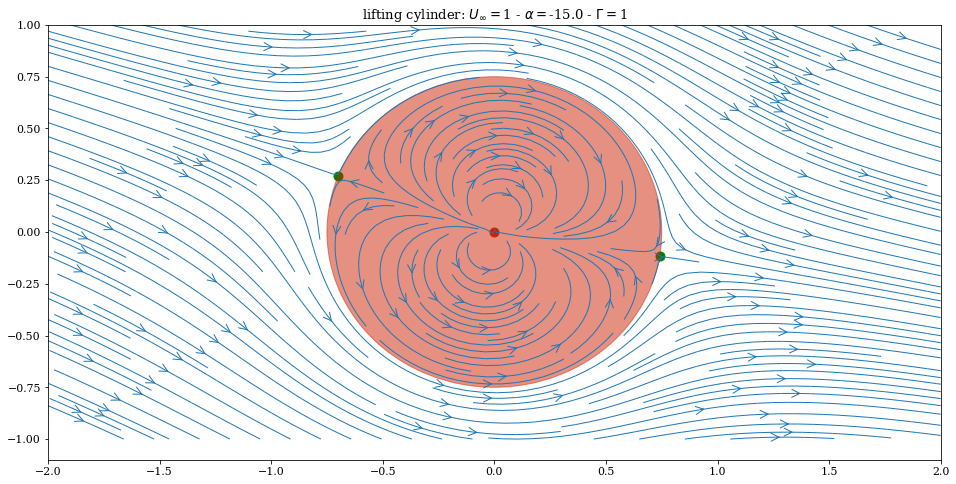

In [57]:
lifting_cylinder(X,Y,U=1,Γ = 1, α = -np.pi/12 , R = 0.75)

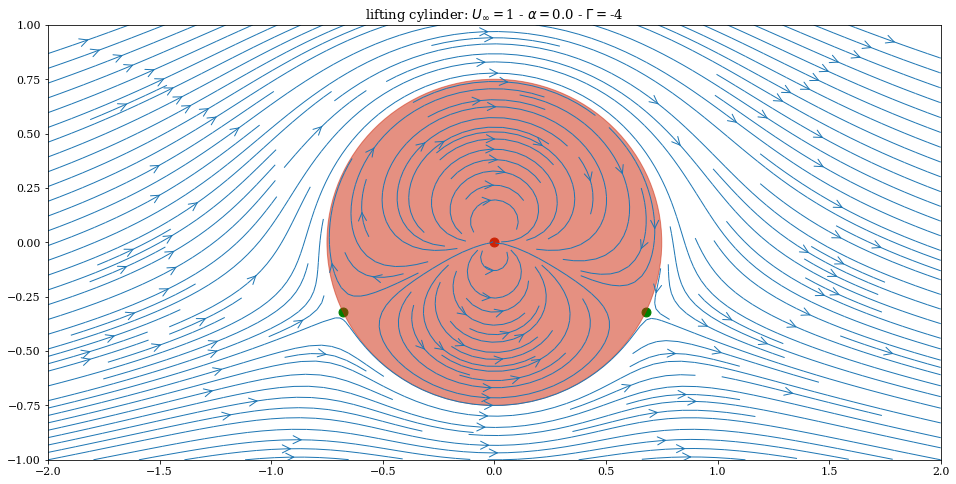

In [58]:
lifting_cylinder(X,Y,U=1,Γ = -4, α = 0 , R = 0.75)

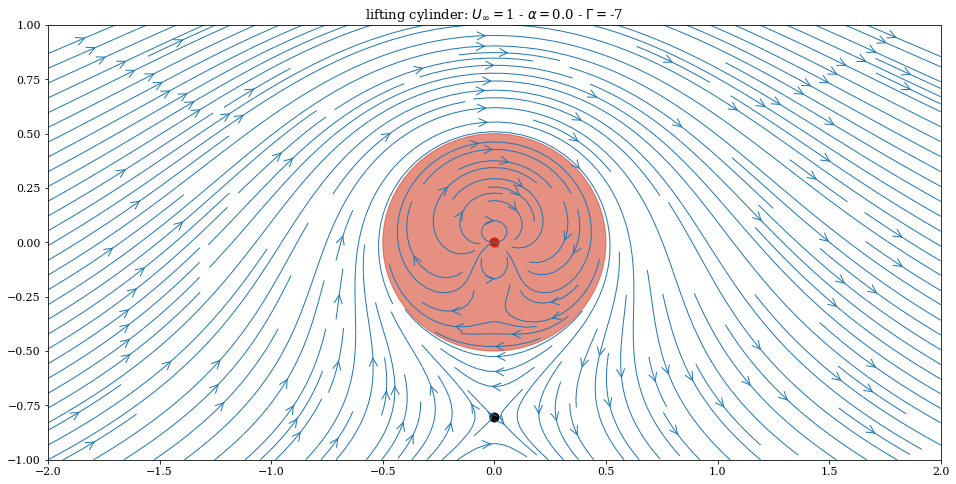

In [59]:
lifting_cylinder(X,Y,U=1,Γ = -7, α = 0 , R = 0.5)